<a href="https://colab.research.google.com/github/VivekLakum/AIML-B_45-2303A52009/blob/main/lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

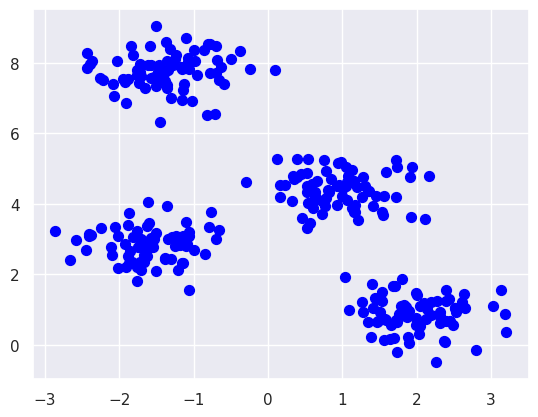

In [6]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

x, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.50, random_state=0)
# Changed 'centre' to 'centers' to specify the number of cluster centers.
plt.scatter(x[:, 0], x[:, 1], s=50,color='blue');

In [7]:
from sklearn.cluster import KMeans
kMeans = KMeans(n_clusters=4, n_init=10)
kMeans.fit(x)
y_kmeans = kMeans.predict(x)

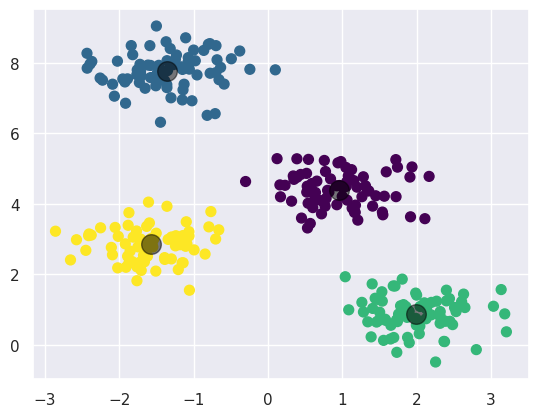

In [9]:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kMeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200,alpha=0.50)

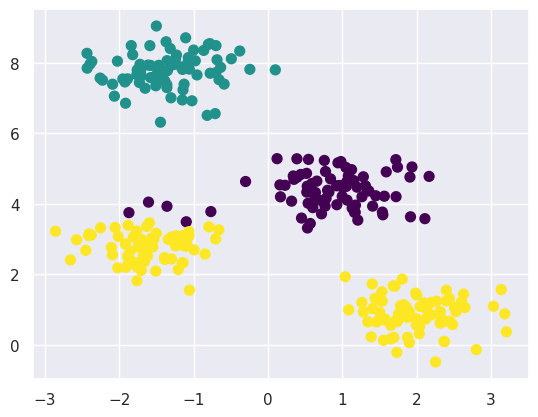

In [12]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(x,n_clusters,rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(x.shape[0])[:n_clusters]
    centers = x[i]
    while True:
        labels = pairwise_distances_argmin(x, centers)
        new_centers = np.array([x[labels == i].mean(0) for i in range(n_clusters)])
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels
centers,labels=find_clusters(x,3)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50,cmap='viridis')


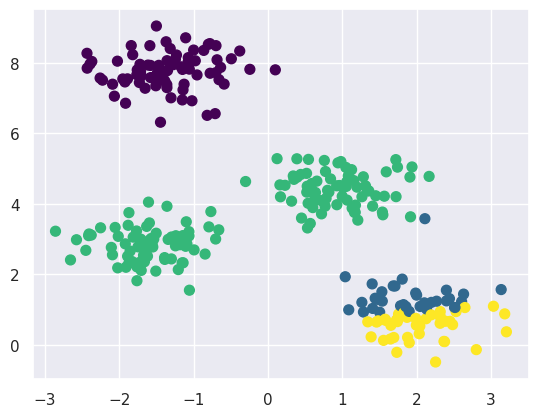

In [13]:
centers,labels=find_clusters(x,4,rseed=0)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50,cmap='viridis')

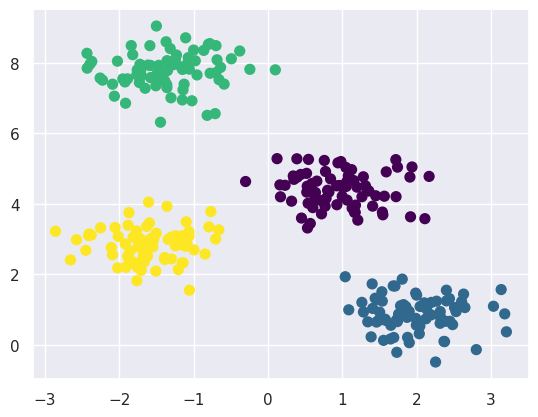

In [16]:
labels=KMeans(4,random_state=0,n_init=10).fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50,cmap='viridis');

In [17]:
from sklearn.datasets import make_moons
x, y = make_moons(200, noise=.05, random_state=0)

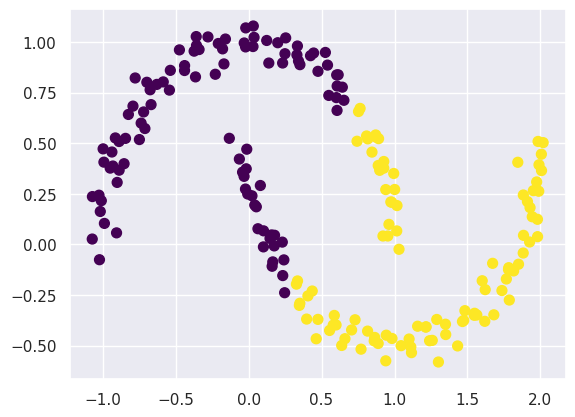

In [18]:
labels=KMeans(2,random_state=0,n_init=10).fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50,cmap='viridis');

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


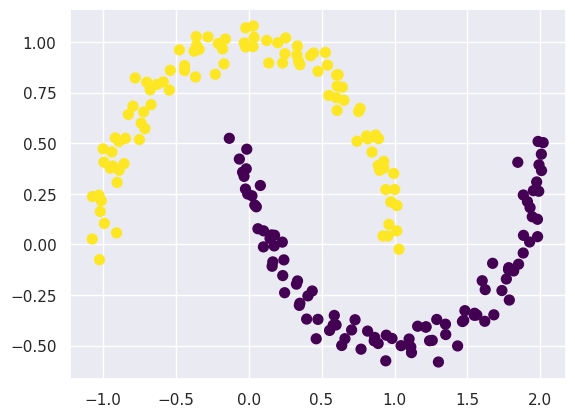

In [20]:
from sklearn.cluster import SpectralClustering
model=SpectralClustering(n_clusters=2,affinity='nearest_neighbors',assign_labels='kmeans')
labels=model.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50,cmap='viridis');

In [21]:
from sklearn.datasets import make_blobs
x, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=0)
X=X[:,0:2]


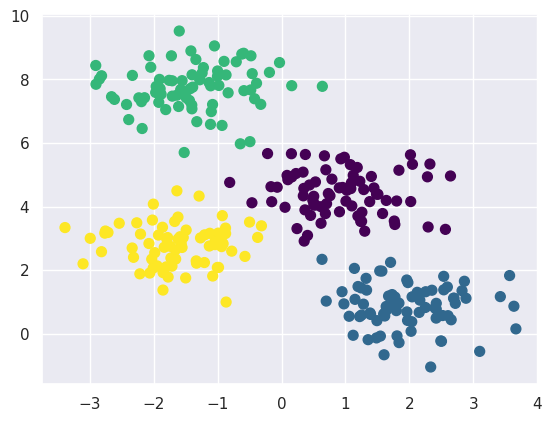

In [22]:
from sklearn.cluster import KMeans
KMeans=KMeans(4,random_state=0,n_init=10)
labels=KMeans.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50,cmap='viridis');

In [23]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [28]:
def plot_kmeans(kmeans,x,n_clusters=4,rseed=0,ax=None):
    labels=kmeans.fit_predict(x)
    ax=ax or plt.gca()
    ax.axis('equal')
    ax.scatter(x[:, 0], x[:, 1], c=labels, s=50,cmap='viridis',zorder=2)
    centers=kmeans.cluster_centers_
    radii=[cdist(x[labels==i], [center]).max() for i,center in enumerate(centers)]
    for c,r in zip(centers,radii):
        ax.add_patch(plt.Circle(c,r,fc='#CCCCCC',lw=3,alpha=0.5,zorder=1))

SyntaxError: invalid syntax (<ipython-input-28-31c2f635f143>, line 9)

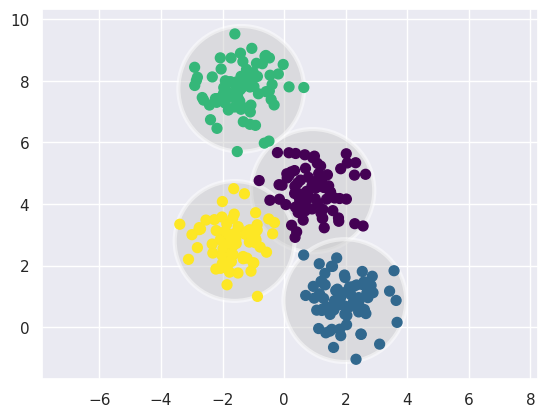

In [27]:
KMeans=KMeans(n_clusters=4,random_state=0)
plot_kmeans(KMeans,x)

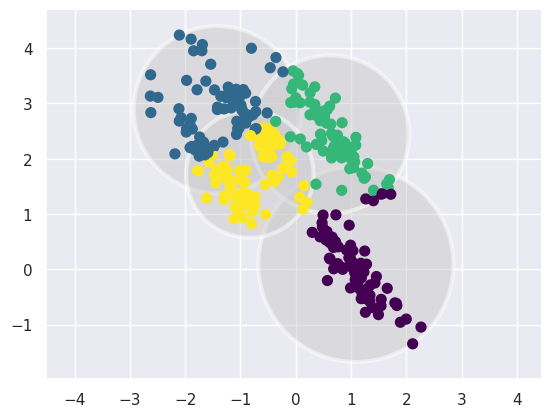

In [36]:
rng =np.random.RandomState(13)
x_stretched=np.dot(x,rng.randn(2,2))
kmeans=KMeans(n_clusters=4,random_state=0,n_init=10)
plot_kmeans(kmeans,x_stretched)

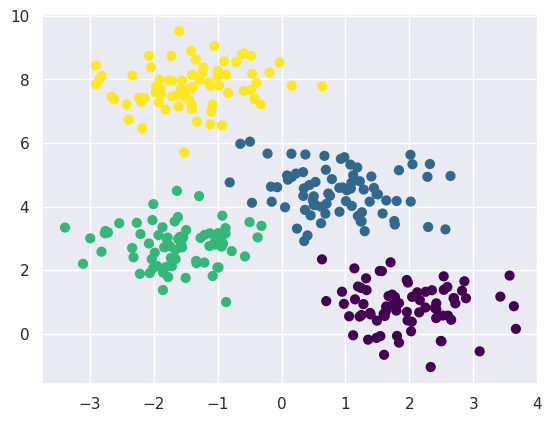

In [33]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=4).fit(x)
labels=gmm.predict(x)
plt.scatter(x[:,0],x[:,1],c=labels,s=40,cmap='viridis');

In [34]:
probs=gmm.predict_proba(x)
print(probs[:5].round(3))

[[0.532 0.364 0.105 0.   ]
 [0.    0.    0.    1.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.965 0.034 0.001 0.   ]]


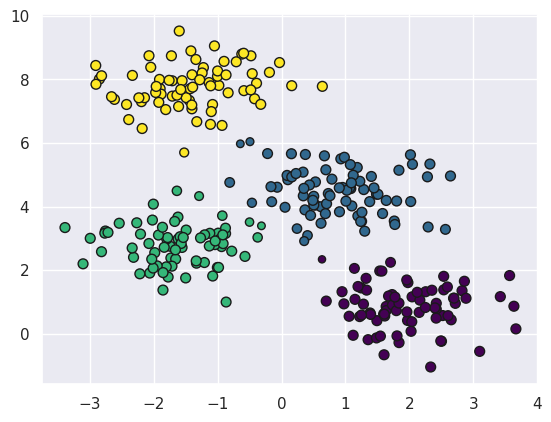

In [35]:
size=probs.max(1)/0.02
plt.scatter(x[:,0],x[:,1],c=labels,edgecolor='k',cmap='viridis',s=size);